# Resolution Plots

**Load libraries**

In [2]:
#load libraries 
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np, math, pylab
#import ROOT
#from ROOT import TFile

import root_pandas
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

from scipy.optimize import curve_fit


Welcome to JupyROOT 6.22/06


**Load ntuples**

In [3]:
# the name of the files doesn't matter, it only matters that it's in GetSimpleTuple format
ntuple_e = root_pandas.read_root("/home/borquez/GetSimpleTuple_dev/bin/prunedC_HSim_v4.root", "ntuple_e")
ntuple_sim = root_pandas.read_root("/home/borquez/GetSimpleTuple_dev/bin/prunedC_HSim_v4.root", "ntuple_sim")

**Print the number of entries in each ntuple.**

In [4]:
print("ntuple_e\tlength =", len(ntuple_e))
print("ntuple_sim\tlength =", len(ntuple_sim))

ntuple_e	length = 490241
ntuple_sim	length = 2199814


**Print the list of variables in each ntuple**

In [5]:
for df, name in (ntuple_e,"electrons"), (ntuple_sim,"hadrons"):
    print(name + ":")
    print(ntuple_sim.columns)
    print("\n")

electrons:
Index(['Q2', 'W', 'Nu', 'Xb', 'Yb', 'vxe', 'vye', 'vze', 'SectorEl',
       'TargType',
       ...
       'mc_vzh', 'mc_Sector', 'mc_Px', 'mc_Py', 'mc_Pz', 'mc_P', 'mc_Betta',
       'mc_Mass2', 'mc_pid', 'mc_deltaZ'],
      dtype='object', length=135)


hadrons:
Index(['Q2', 'W', 'Nu', 'Xb', 'Yb', 'vxe', 'vye', 'vze', 'SectorEl',
       'TargType',
       ...
       'mc_vzh', 'mc_Sector', 'mc_Px', 'mc_Py', 'mc_Pz', 'mc_P', 'mc_Betta',
       'mc_Mass2', 'mc_pid', 'mc_deltaZ'],
      dtype='object', length=135)




**Draw the resolutions plots**

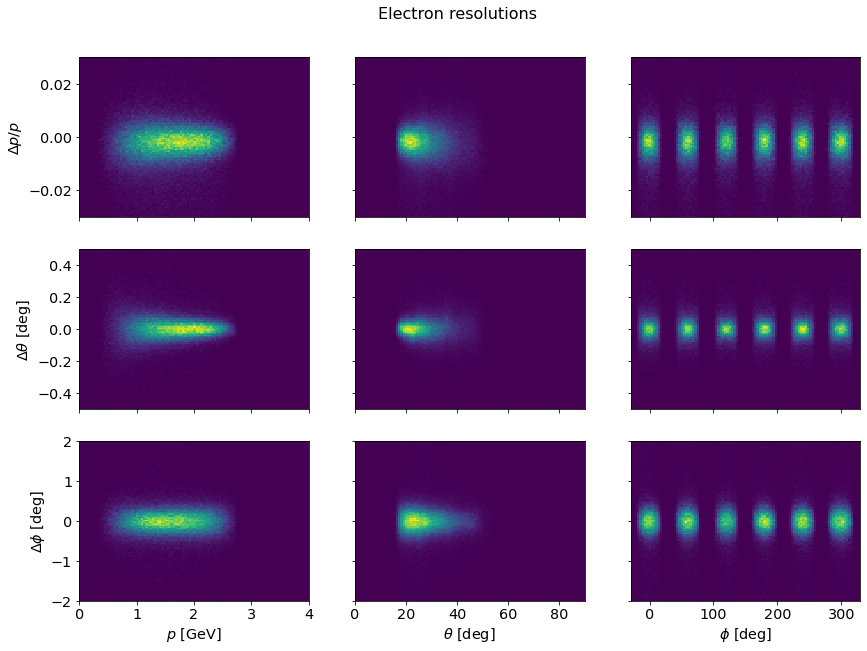

In [6]:
df = ntuple_e.query("mc_P != -9999 and P != -9999 and Q2 > 1 and W > 2 and mc_Q2 > 1 and mc_W > 2")

fig,axs = plt.subplots(3,3, figsize=(14,10),sharey='row',sharex='col')
for i,(xvar,xrange) in enumerate(zip(("mc_P","mc_ThetaLab","mc_PhiLab"),
                           ((0,4),(0,90),(-30,330)))):
    axs[0][i].hist2d(df.eval(xvar), (df.P - df.mc_P)/df.P,bins=(100,100), range=(xrange,(-0.03,0.03)))
    axs[1][i].hist2d(df.eval(xvar), (df.ThetaLab - df.mc_ThetaLab),bins=(100,100), range=(xrange,(-0.5,0.5)))
    axs[2][i].hist2d(df.eval(xvar), (df.PhiLab - df.mc_PhiLab),bins=(100,100), range=(xrange,(-2,2)))

axs[0][0].set_ylabel("$\\Delta p/p$")
axs[1][0].set_ylabel("$\\Delta\\theta$ [deg]")
axs[2][0].set_ylabel("$\\Delta\\phi$ [deg]")
axs[2][0].set_xlabel("$p$ [GeV]")
axs[2][1].set_xlabel("$\\theta$ [deg]")
axs[2][2].set_xlabel("$\\phi$ [deg]")
fig.suptitle('Electron resolutions', fontsize=16, verticalalignment='top',y=0.95)
plt.show()

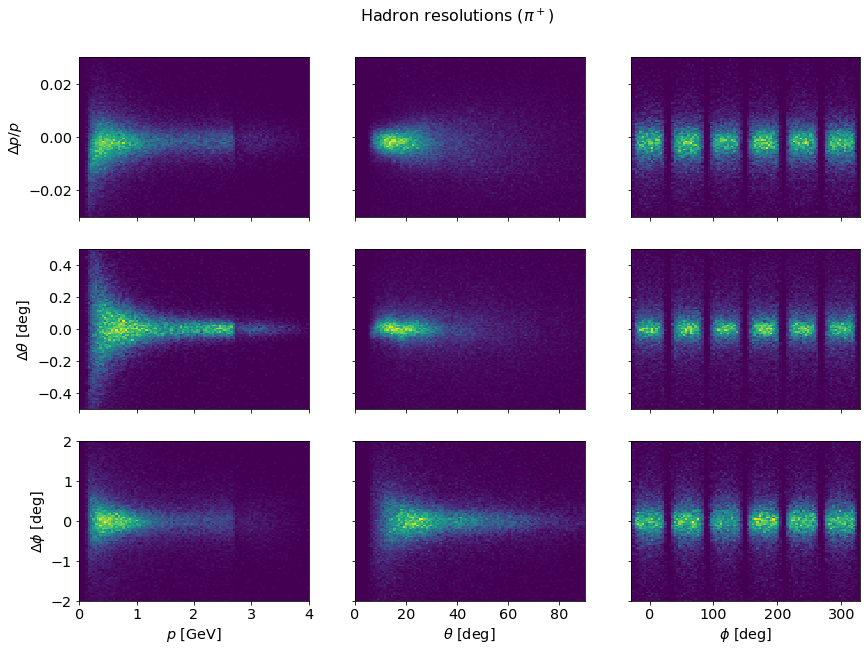

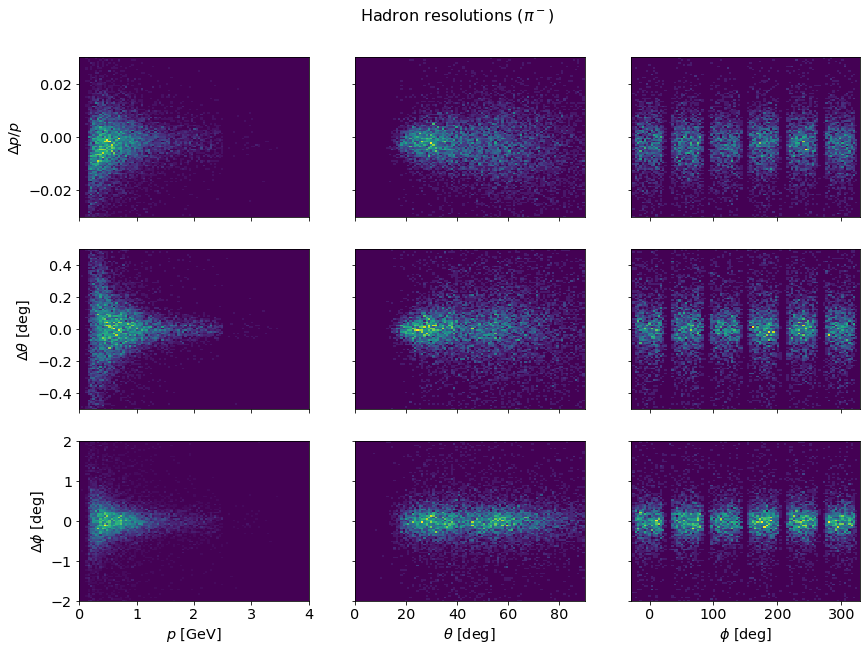

In [7]:
for pid, name in (211, "$\\pi^+$"),(-211, "$\\pi^-$"):
    df = ntuple_sim.query("Q2 > 1 and W > 2 and mc_Q2 > 1 and mc_W > 2 and mc_P != -9999 and P != -9999 and mc_pid == %s"% pid)
    fig,axs = plt.subplots(3,3, figsize=(14,10),sharey='row',sharex='col')
    for i,(xvar,xrange) in enumerate(zip(("mc_P","mc_ThetaLab","mc_PhiLab"),
                               ((0,4),(0,90),(-30,330)))):
        axs[0][i].hist2d(df.eval(xvar), (df.P - df.mc_P)/df.P,bins=(100,100), range=(xrange,(-0.03,0.03)))
        axs[1][i].hist2d(df.eval(xvar), (df.ThetaLab - df.mc_ThetaLab),bins=(100,100), range=(xrange,(-0.5,0.5)))
        axs[2][i].hist2d(df.eval(xvar), (df.PhiLab - df.mc_PhiLab),bins=(100,100), range=(xrange,(-2,2)))

    axs[0][0].set_ylabel("$\\Delta p/p$")
    axs[1][0].set_ylabel("$\\Delta\\theta$ [deg]")
    axs[2][0].set_ylabel("$\\Delta\\phi$ [deg]")
    axs[2][0].set_xlabel("$p$ [GeV]")
    axs[2][1].set_xlabel("$\\theta$ [deg]")
    axs[2][2].set_xlabel("$\\phi$ [deg]")
    fig.suptitle('Hadron resolutions (%s)' % name, fontsize=16, verticalalignment='top',y=0.95)
    plt.show()

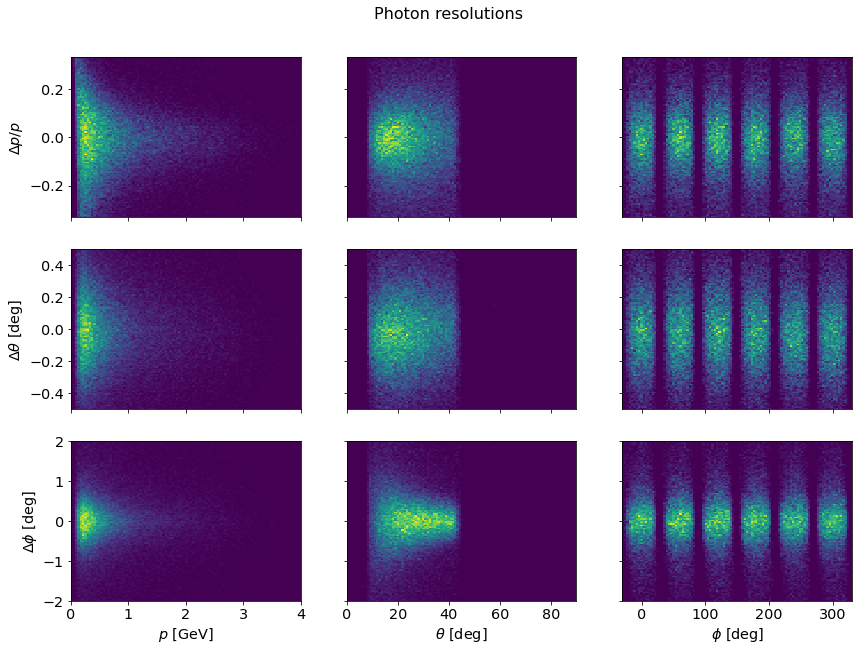

In [8]:
pid=22
name="$\\gamma$"
df = ntuple_sim.query("Q2 > 1 and W > 2 and mc_Q2 > 1 and mc_W > 2 and mc_P != -9999 and P != -9999 and mc_pid == %s"% pid)
fig,axs = plt.subplots(3,3, figsize=(14,10),sharey='row',sharex='col')
for i,(xvar,xrange) in enumerate(zip(("mc_P","mc_ThetaLab","mc_PhiLab"), ((0,4),(0,90),(-30,330)))):
    axs[0][i].hist2d(df.eval(xvar), (df.P - df.mc_P)/df.P,bins=(100,100), range=(xrange,(-0.33,0.33)))
    axs[1][i].hist2d(df.eval(xvar), (df.ThetaLab - df.mc_ThetaLab),bins=(100,100), range=(xrange,(-0.5,0.5)))
    axs[2][i].hist2d(df.eval(xvar), (df.PhiLab - df.mc_PhiLab),bins=(100,100), range=(xrange,(-2,2)))

axs[0][0].set_ylabel("$\\Delta p/p$")
axs[1][0].set_ylabel("$\\Delta\\theta$ [deg]")
axs[2][0].set_ylabel("$\\Delta\\phi$ [deg]")
axs[2][0].set_xlabel("$p$ [GeV]")
axs[2][1].set_xlabel("$\\theta$ [deg]")
axs[2][2].set_xlabel("$\\phi$ [deg]")
fig.suptitle('Photon resolutions', fontsize=16, verticalalignment='top',y=0.95)
plt.show()